<a href="https://colab.research.google.com/github/sathish0416/LDA/blob/main/LDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standardized Data -> Mean: -0.000000, Std: 1.000000
Original shape: (150, 4), LDA shape: (150, 2)
LDA Explained Variance Ratio: [0.9912 0.0088]
PCA Explained Variance Ratio: [0.7296 0.2285]


<ipython-input-6-ea2581e91645>:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend1 = axes[0].legend(*scatter1.legend_elements(), title="Classes", labels=class_labels)
<ipython-input-6-ea2581e91645>:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend2 = axes[1].legend(*scatter2.legend_elements(), title="Classes", labels=class_labels)


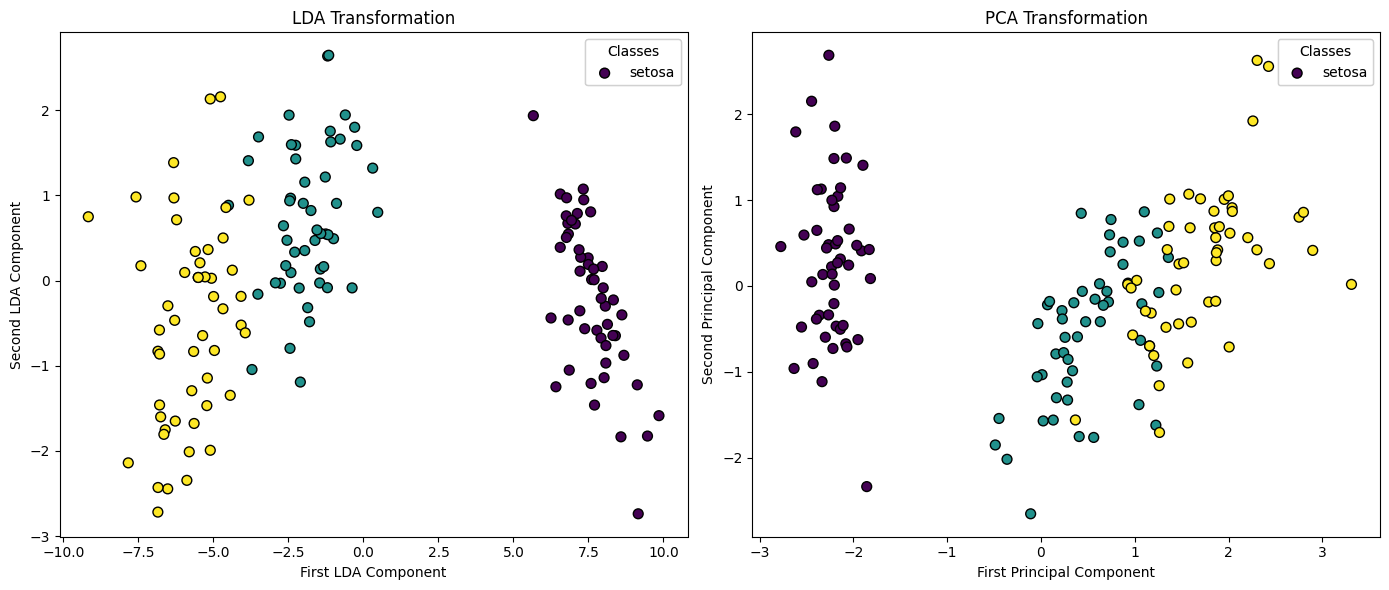

Inter-class Distance (LDA): 9.4797
Inter-class Distance (PCA): 2.8476


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import seaborn as sns

def lab1_lda_analysis():

    iris = load_iris()
    X, y = iris.data, iris.target
    class_labels = iris.target_names


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Standardized Data -> Mean: {X_scaled.mean():.6f}, Std: {X_scaled.std():.6f}")


    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y)
    print(f"Original shape: {X.shape}, LDA shape: {X_lda.shape}")
    print(f"LDA Explained Variance Ratio: {lda.explained_variance_ratio_.round(4)}")


    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_.round(4)}")


    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # LDA Visualization
    scatter1 = axes[0].scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    axes[0].set_title('LDA Transformation')
    axes[0].set_xlabel('First LDA Component')
    axes[0].set_ylabel('Second LDA Component')


    legend1 = axes[0].legend(*scatter1.legend_elements(), title="Classes", labels=class_labels)
    axes[0].add_artist(legend1)


    scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    axes[1].set_title('PCA Transformation')
    axes[1].set_xlabel('First Principal Component')
    axes[1].set_ylabel('Second Principal Component')


    legend2 = axes[1].legend(*scatter2.legend_elements(), title="Classes", labels=class_labels)
    axes[1].add_artist(legend2)

    plt.tight_layout()
    plt.show()



    class_means_lda = [np.mean(X_lda[y == i], axis=0) for i in range(3)]
    class_means_pca = [np.mean(X_pca[y == i], axis=0) for i in range(3)]

    lda_dist = np.linalg.norm(class_means_lda[0] - class_means_lda[1]).round(4)
    pca_dist = np.linalg.norm(class_means_pca[0] - class_means_pca[1]).round(4)

    print(f"Inter-class Distance (LDA): {lda_dist}")
    print(f"Inter-class Distance (PCA): {pca_dist}")

if __name__ == "__main__":
    lab1_lda_analysis()
